In [131]:
# read in the dataframe
import pandas as pd
import numpy as np
df = pd.read_csv("Motor vehicle insurance data.csv", delimiter=";", dayfirst=True)
print(df.shape)
print(df)

(105555, 30)
           ID Date_start_contract Date_last_renewal Date_next_renewal  \
0           1          05/11/2015        05/11/2015        05/11/2016   
1           1          05/11/2015        05/11/2016        05/11/2017   
2           1          05/11/2015        05/11/2017        05/11/2018   
3           1          05/11/2015        05/11/2018        05/11/2019   
4           2          26/09/2017        26/09/2017        26/09/2018   
...       ...                 ...               ...               ...   
105550  53498          30/07/2018        30/07/2018        30/07/2019   
105551  53499          16/08/2018        16/08/2018        16/08/2019   
105552  53500          21/11/2018        21/11/2018        21/11/2019   
105553  53501          21/11/2018        21/11/2018        21/11/2019   
105554  53502          01/10/2018        01/10/2018        01/10/2019   

        Date_birth Date_driving_licence  Distribution_channel  Seniority  \
0       15/04/1956           20/03

In [132]:
# normalization
# Convert date string to datetime object
df["Date_birth"] = pd.to_datetime(df["Date_birth"], format="%d/%m/%Y")

# Reference date: 1 January 2025
ref_date = pd.Timestamp("2025-01-01")

# Compute age in years
df["Age"] = (ref_date - df["Date_birth"]).dt.days // 365

# Linear Model

In [133]:
# noramlize data to 0-1 range
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()

# Extract X (all relevant columns except Premium)
X = np.asarray(df[["Age", "Seniority", "Cost_claims_year", "N_claims_year"]])
X = scaler.fit_transform(X)
# print(X)

# Extract y (Premium)
y = np.asarray(df["Premium"])

## Statsmodels API

In [134]:
import statsmodels.api as sm

X_const = sm.add_constant(X)   # add intercept term

model = sm.GLM(y, X_const, family=sm.families.Gaussian())
results = model.fit()

print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               105555
Model:                            GLM   Df Residuals:                   105550
Model Family:                Gaussian   Df Model:                            4
Link Function:               Identity   Scale:                          19379.
Method:                          IRLS   Log-Likelihood:            -6.7079e+05
Date:                Thu, 20 Nov 2025   Deviance:                   2.0454e+09
Time:                        18:43:53   Pearson chi2:                 2.05e+09
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02460
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        315.8926      0.428    737.253      0.0

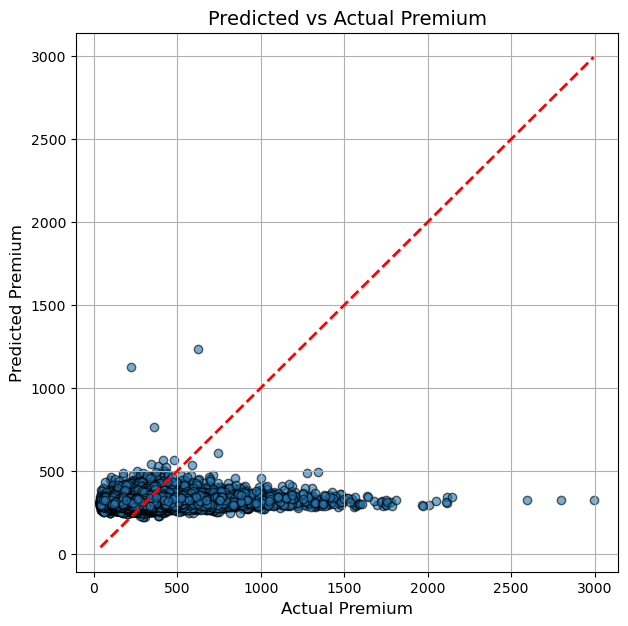

In [135]:
# plot predictions
import matplotlib.pyplot as plt

A = sm.add_constant(X)
y_pred = results.predict(A)


plt.figure(figsize=(7,7))

plt.scatter(y, y_pred, alpha=0.6, edgecolors='k')
plt.xlabel("Actual Premium", fontsize=12)
plt.ylabel("Predicted Premium", fontsize=12)
plt.title("Predicted vs Actual Premium", fontsize=14)

# Add y=x line for reference
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)  # perfect prediction line

plt.grid(True)
plt.show()


## In-Class Version

In [136]:
# n = 105555
# d = 30

# X = np.random.rand(n,d)
# Y  = 1.*(X[:,0]>.5)
# Mat = np.hstack([np.ones((n,1)),X])
# alpha = np.linalg.lstsq(Mat,Y)[0]
# Y_lin_approx = Mat@alpha
# print(Y_lin_approx)